In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle

# Load the dataset
df = pd.read_csv('../artifacts/weather_classification_data.csv')

# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [2]:
from sklearn.impute import SimpleImputer

# Define column groups
num_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'Visibility (km)']
ordinal_cols = ['UV Index']
nominal_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

# Filter only columns with missing values
ordinal_missing = [col for col in ordinal_cols if df[col].isnull().any()]
nominal_missing = [col for col in nominal_cols if df[col].isnull().any()]
num_missing = [col for col in num_cols if df[col].isnull().any()]

# Impute Numerical (mean)
if num_missing:
    imputer = SimpleImputer(strategy='mean')
    df[num_missing] = imputer.fit_transform(df[num_missing])
    print(f"Mean imputation applied to numerical columns: {num_missing}")
else:
    print("No missing values found in numerical columns.")

# Impute Ordinal (mean)
if ordinal_missing:
    mean_imputer = SimpleImputer(strategy='mean')
    df[ordinal_missing] = mean_imputer.fit_transform(df[ordinal_missing])
    print(f"Mean imputation applied to ordinal columns: {ordinal_missing}")
else:
    print("No missing values found in ordinal columns.")

# Impute Nominal (mode)
if nominal_missing:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    df[nominal_missing] = mode_imputer.fit_transform(df[nominal_missing])
    print(f"Mode imputation applied to nominal columns: {nominal_missing}")
else:
    print("No missing values found in nominal columns.")

No missing values found in numerical columns.
No missing values found in ordinal columns.
No missing values found in nominal columns.


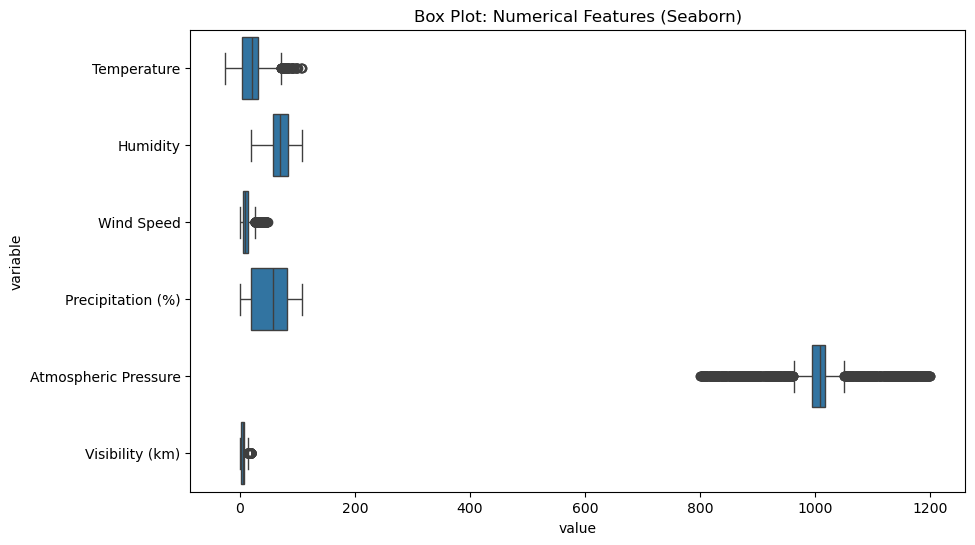

In [3]:
melted_df = df.melt(value_vars=num_cols)
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='value', y='variable', orient='h')
plt.title('Box Plot: Numerical Features (Seaborn)')
plt.show()

In [4]:
def remove_outliers_iqr(df, columns):
    original_shape = df.shape[0]  # Total rows before any removal
    total_removed = 0
    iteration = 1

    while True:
        removed_in_iteration = 0
        print(f"\n--- Iteration {iteration} ---")

        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            before_count = df.shape[0]
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            after_count = df.shape[0]
            removed = before_count - after_count

            removed_in_iteration += removed
            if removed > 0:
                print(f"{removed} outlier(s) removed from '{col}'.")
            else:
                print(f"No outliers found in '{col}'.")

        total_removed += removed_in_iteration

        if removed_in_iteration == 0:
            break
        iteration += 1

    print(f"\nTotal rows removed: {total_removed}")
    print(f"Final dataset size: {df.shape[0]} rows\n")

    return df



df_clean = remove_outliers_iqr(df, num_cols)

with open("../artifacts/cleaned_data.csv", "w") as f:
    df_clean.to_csv(f, index=False)


--- Iteration 1 ---
92 outlier(s) removed from 'Temperature'.
No outliers found in 'Humidity'.
396 outlier(s) removed from 'Wind Speed'.
No outliers found in 'Precipitation (%)'.
927 outlier(s) removed from 'Atmospheric Pressure'.
96 outlier(s) removed from 'Visibility (km)'.

--- Iteration 2 ---
60 outlier(s) removed from 'Temperature'.
98 outlier(s) removed from 'Humidity'.
No outliers found in 'Wind Speed'.
No outliers found in 'Precipitation (%)'.
8 outlier(s) removed from 'Atmospheric Pressure'.
20 outlier(s) removed from 'Visibility (km)'.

--- Iteration 3 ---
No outliers found in 'Temperature'.
No outliers found in 'Humidity'.
No outliers found in 'Wind Speed'.
No outliers found in 'Precipitation (%)'.
No outliers found in 'Atmospheric Pressure'.
No outliers found in 'Visibility (km)'.

Total rows removed: 1697
Final dataset size: 11503 rows

